# Preprocessing of Data Science Job Salaries

## First we import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## We load the dataset and display the first 5 rows

In [2]:
data=pd.read_csv('F:\DATA SETS\ds_salaries.csv')
pd.set_option('display.max_columns',None)
data.head(20)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000.0,EUR,85847.0,ES,100,ES,NaN
1,2023,MI,NaN,ML Engineer,30000.0,USD,30000.0,US,100,US,S
2,2023,MI,CT,ML Engineer,25500.0,USD,NaN,US,100,US,S
3,2023,SE,FT,NaN,175000.0,USD,175000.0,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000.0,USD,120000.0,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200.0,USD,222200.0,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000.0,USD,136000.0,US,0,US,L
7,2023,SE,NaN,Data Scientist,219000.0,USD,219000.0,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000.0,USD,141000.0,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100.0,USD,147100.0,US,0,US,M


In [3]:
data.ndim

2

In [4]:
data.shape

(3755, 11)

In [5]:
data.isnull().sum()

work_year              0
experience_level       6
employment_type       15
job_title             16
salary                 7
salary_currency        0
salary_in_usd         12
employee_residence     0
remote_ratio           0
company_location       0
company_size          15
dtype: int64

In [6]:
data.dtypes

work_year               int64
experience_level       object
employment_type        object
job_title              object
salary                float64
salary_currency        object
salary_in_usd         float64
employee_residence     object
remote_ratio            int64
company_location       object
company_size           object
dtype: object

In [7]:
data.work_year=data.work_year.astype('object')
data.remote_ratio=data.remote_ratio.astype('object')

In [8]:
data.dtypes

work_year              object
experience_level       object
employment_type        object
job_title              object
salary                float64
salary_currency        object
salary_in_usd         float64
employee_residence     object
remote_ratio           object
company_location       object
company_size           object
dtype: object

In [9]:
data.remote_ratio.unique()

array([100, 0, 50], dtype=object)

In [10]:
data.employee_residence.unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'PT', 'NL', 'CH',
       'CF', 'FR', 'AU', 'FI', 'UA', 'IE', 'IL', 'GH', 'AT', 'CO', 'SG',
       'SE', 'SI', 'MX', 'UZ', 'BR', 'TH', 'HR', 'PL', 'KW', 'VN', 'CY',
       'AR', 'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA',
       'LT', 'BE', 'AS', 'IR', 'HU', 'SK', 'CN', 'CZ', 'CR', 'TR', 'CL',
       'PR', 'DK', 'BO', 'PH', 'DO', 'EG', 'ID', 'AE', 'MY', 'JP', 'EE',
       'HN', 'TN', 'RU', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'NZ', 'MD', 'LU',
       'MT'], dtype=object)

In [11]:
data.company_location.unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'UA', 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI',
       'MX', 'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE',
       'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT',
       'AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK',
       'BO', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'MT'], dtype=object)

In [12]:
data.job_title.unique()

array(['Principal Data Scientist', 'ML Engineer', nan, 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learni

In [13]:
data.employment_type.unique()

array(['FT', nan, 'CT', 'FL', 'PT'], dtype=object)

In [14]:
data.experience_level.unique()

array(['SE', 'MI', 'EN', 'EX', nan], dtype=object)

In [15]:
data.company_size.unique()

array([nan, 'S', 'M', 'L'], dtype=object)

In [16]:
data.company_size.value_counts()

M    3140
L     452
S     148
Name: company_size, dtype: int64

In [17]:
data.work_year.value_counts()

2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64

In [18]:
data.experience_level.value_counts()

SE    2510
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

In [19]:
data.job_title.value_counts()

Data Engineer                          1035
Data Scientist                          838
Data Analyst                            610
Machine Learning Engineer               287
Analytics Engineer                      101
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [20]:
data.company_location.value_counts()

US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64

In [21]:
data.employee_residence.value_counts()

US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: employee_residence, Length: 78, dtype: int64

In [22]:
data.remote_ratio.value_counts()

0      1923
100    1643
50      189
Name: remote_ratio, dtype: int64

In [23]:
data.employment_type.value_counts()

FT    3704
PT      17
FL      10
CT       9
Name: employment_type, dtype: int64

In [24]:
data.describe(include=object)

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
count,3755,3749,3740,3739,3755,3755,3755,3755,3740
unique,4,4,4,93,20,78,3,72,3
top,2023,SE,FT,Data Engineer,USD,US,0,US,M
freq,1785,2510,3704,1035,3224,3004,1923,3040,3140


In [25]:
data.describe(include='float64') 

,salary,salary_in_usd
count,3.748000e+03,3743.000000
mean,1.907356e+05,137557.854662
std,6.723018e+05,63080.791725
min,6.000000e+03,5132.000000
25%,1.000000e+05,95000.000000
50%,1.375000e+05,135000.000000
75%,1.800000e+05,175000.000000
max,3.040000e+07,450000.000000


In [26]:
data=data.drop('salary_currency',axis=1)

In [27]:
data=data.drop('salary',axis=1)

In [28]:
data.rename(columns={'salary_in_usd':'salary'},inplace=True)

In [29]:
data.isnull().sum()

work_year              0
experience_level       6
employment_type       15
job_title             16
salary                12
employee_residence     0
remote_ratio           0
company_location       0
company_size          15
dtype: int64

In [30]:
data.salary=data.salary.fillna(data.salary.median())

In [31]:
data.isnull().sum()

work_year              0
experience_level       6
employment_type       15
job_title             16
salary                 0
employee_residence     0
remote_ratio           0
company_location       0
company_size          15
dtype: int64

In [32]:
from sklearn.impute import SimpleImputer
impute_mode=SimpleImputer(strategy='most_frequent')
impute_mode.fit(data[['experience_level','employment_type','job_title','company_size']])
data[['experience_level','employment_type','job_title','company_size']]=impute_mode.transform(data[['experience_level','employment_type','job_title','company_size']])
data.head(10)

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847.0,ES,100,ES,M
1,2023,MI,FT,ML Engineer,30000.0,US,100,US,S
2,2023,MI,CT,ML Engineer,135000.0,US,100,US,S
3,2023,SE,FT,Data Engineer,175000.0,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000.0,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200.0,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000.0,US,0,US,L
7,2023,SE,FT,Data Scientist,219000.0,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000.0,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100.0,US,0,US,M


In [33]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


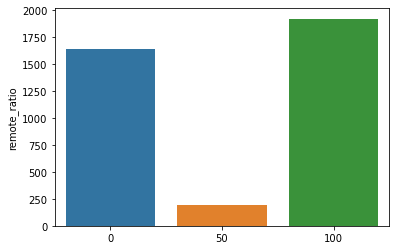

In [34]:
sns.barplot(data.remote_ratio.unique(),data.remote_ratio.value_counts())
plt.show()

C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


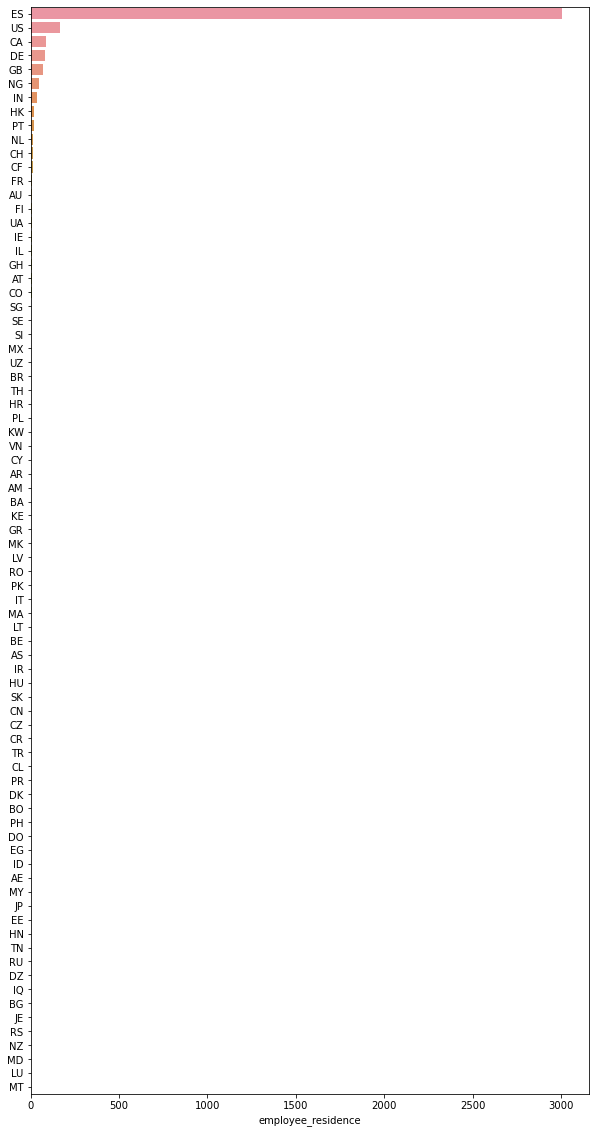

In [35]:
plt.figure(figsize=(10,20))
sns.barplot(data.employee_residence.value_counts(),data.employee_residence.unique())
plt.show()

C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


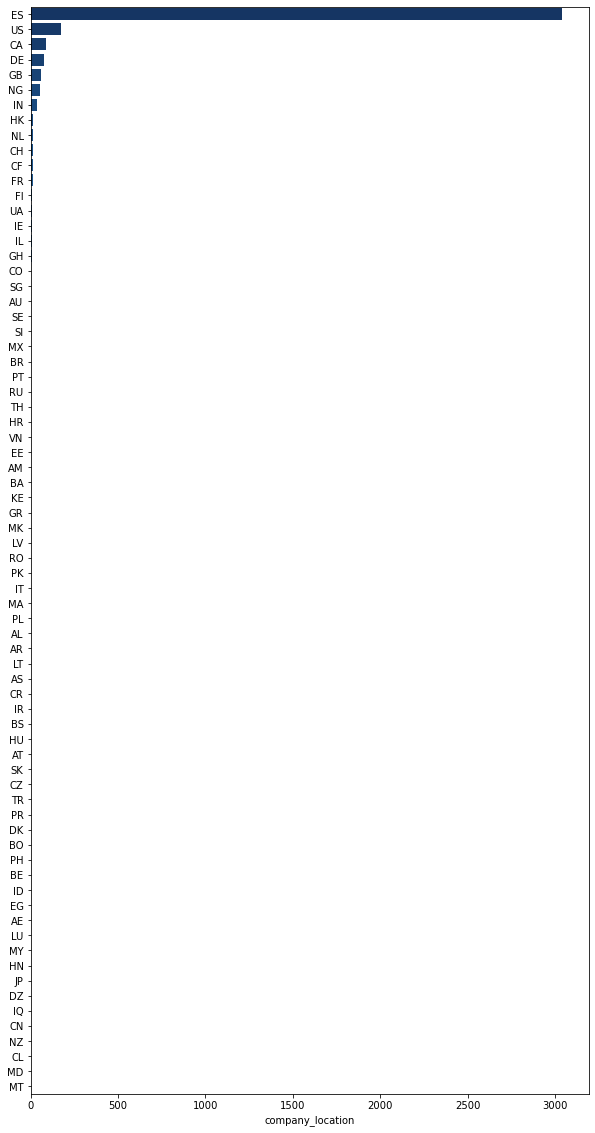

In [36]:
plt.figure(figsize=(10,20))
sns.barplot(data.company_location.value_counts(),data.company_location.unique(),palette='Blues_r')
plt.show()

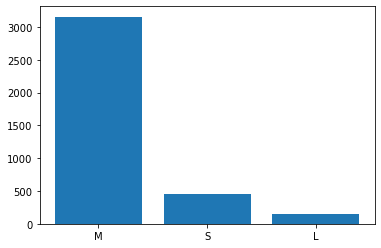

In [37]:
y= data.company_size.value_counts()
x= data.company_size.unique()
fig=plt.figure(figsize=(6,4))
plt.bar(x,y)
plt.show()

C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


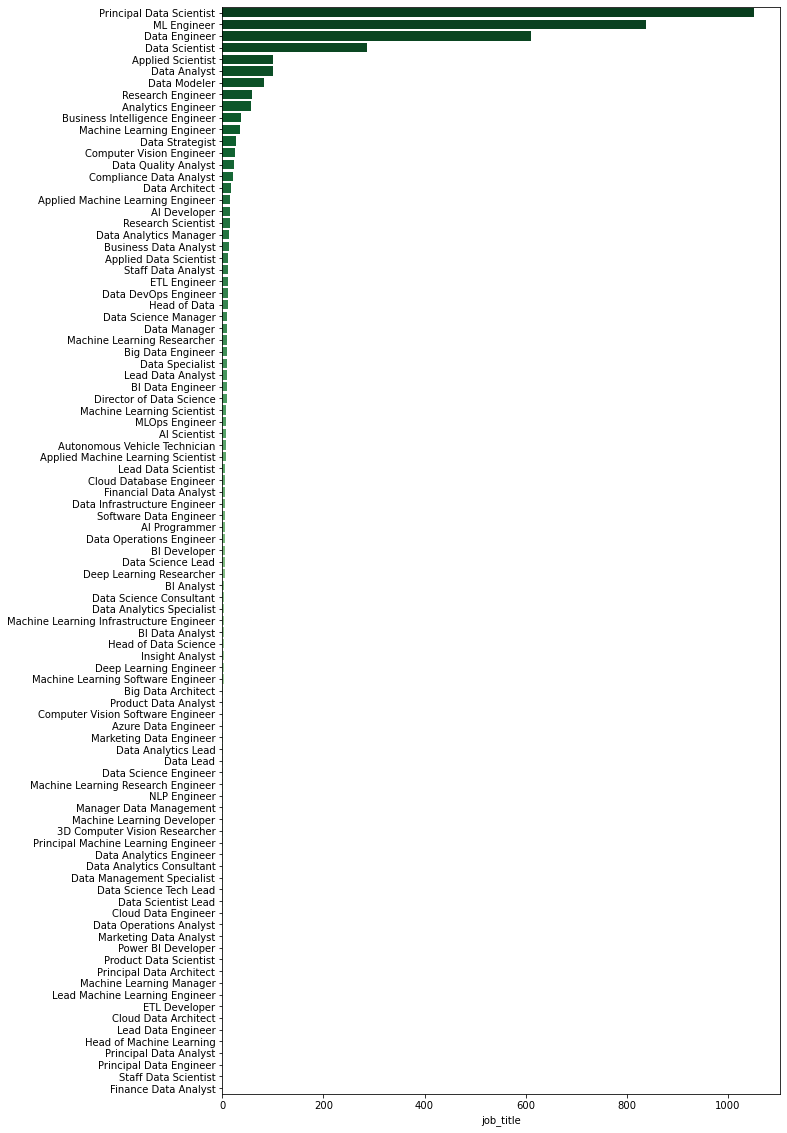

In [38]:
plt.figure(figsize=(10,20))
sns.barplot(data.job_title.value_counts(),data.job_title.unique(),palette='Greens_r')
plt.show()

C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


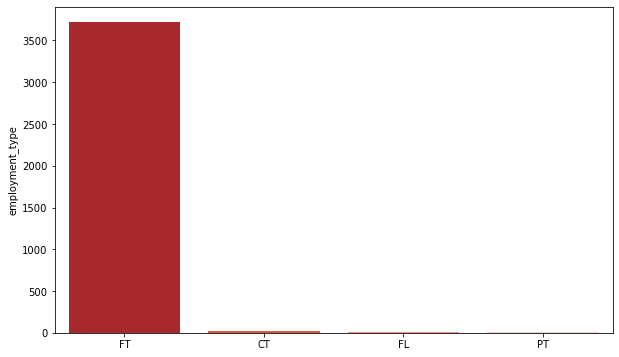

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(data.employment_type.unique(),data.employment_type.value_counts(),palette='Reds_r')
plt.show()

C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


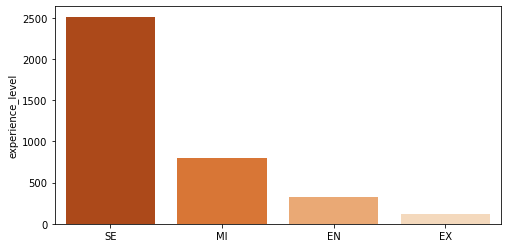

In [40]:
plt.figure(figsize=(8,4))
sns.barplot(data.experience_level.unique(),data.experience_level.value_counts(),palette='Oranges_r')
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
data.company_size.value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
data.experience_level.value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
data.remote_ratio.value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [ ]:
plt.figure(figsize=(9,6))
plt.hist(data.salary,bins=20)
plt.xlabel('salaries',fontsize=15)
plt.show()

In [ ]:
plt.figure(figsize=(7,5))
plt.boxplot(data.salary)
plt.ylabel('salaries')
plt.show()

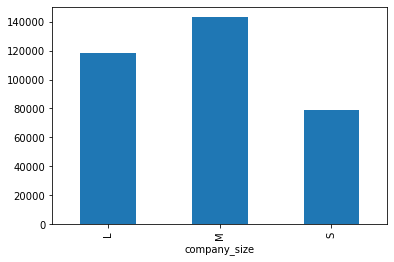

In [41]:
data.groupby('company_size')['salary'].mean().plot.bar()
plt.show()

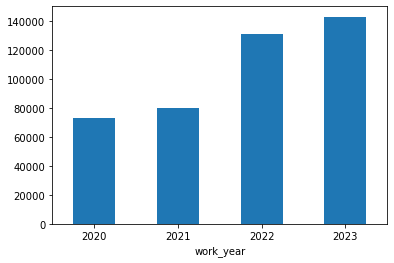

In [42]:
data.groupby('work_year')['salary'].median().plot.bar()
plt.xticks(rotation='horizontal')
plt.show()

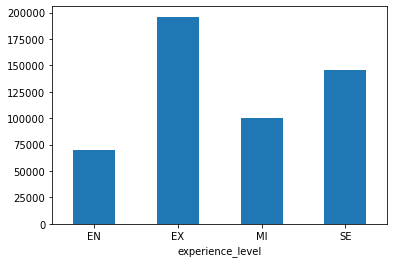

In [43]:
data.groupby('experience_level')['salary'].median().plot.bar()
plt.xticks(rotation='horizontal')
plt.show()

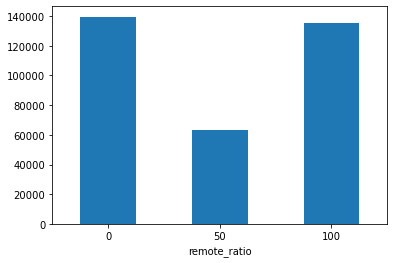

In [44]:
data.groupby('remote_ratio')['salary'].median().plot.bar()
plt.xticks(rotation='horizontal')
plt.show()

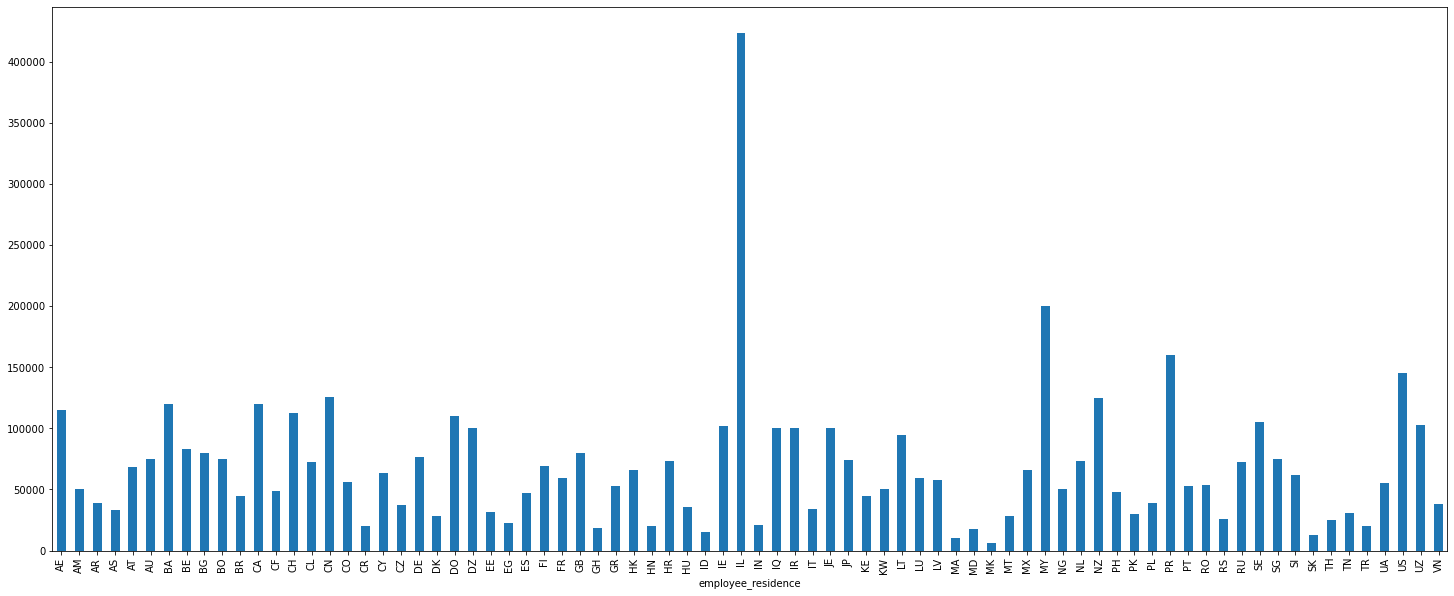

In [45]:
plt.figure(figsize=(25,10))
data.groupby('employee_residence')['salary'].median().plot.bar()
plt.show()

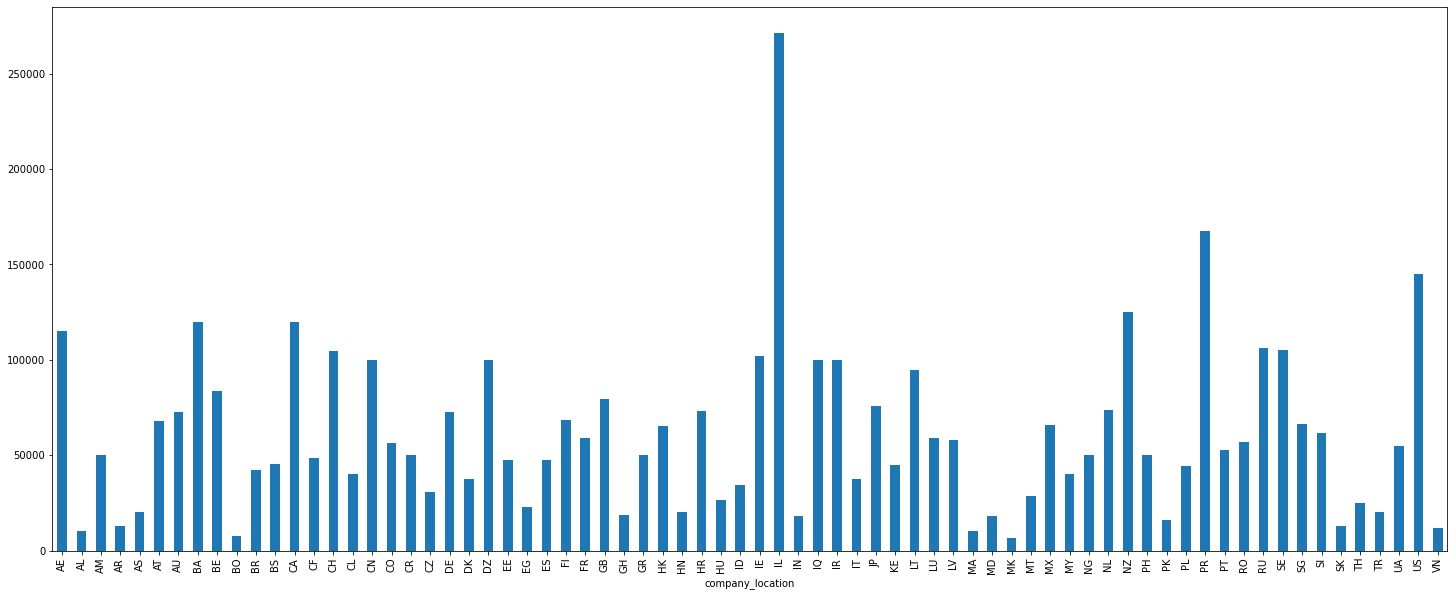

In [46]:
plt.figure(figsize=(25,10))
data.groupby('company_location')['salary'].median().plot.bar()
plt.show()

In [47]:
pd.options.display.float_format = '{:,.0f}'.format
salary_jobtitle = data.groupby(by='job_title').median().sort_values(by='salary', ascending=False)
salary_jobtitle.reset_index(inplace=True)
salary_jobtitle

,job_title,salary
0,Data Science Tech Lead,"375,000"
1,Cloud Data Architect,"250,000"
2,Data Lead,"212,500"
3,Data Analytics Lead,"211,254"
4,Head of Data,"202,500"
...,...,...
88,Product Data Analyst,"20,000"
89,Staff Data Analyst,"15,000"
90,3D Computer Vision Researcher,"15,000"
91,Product Data Scientist,"8,000"


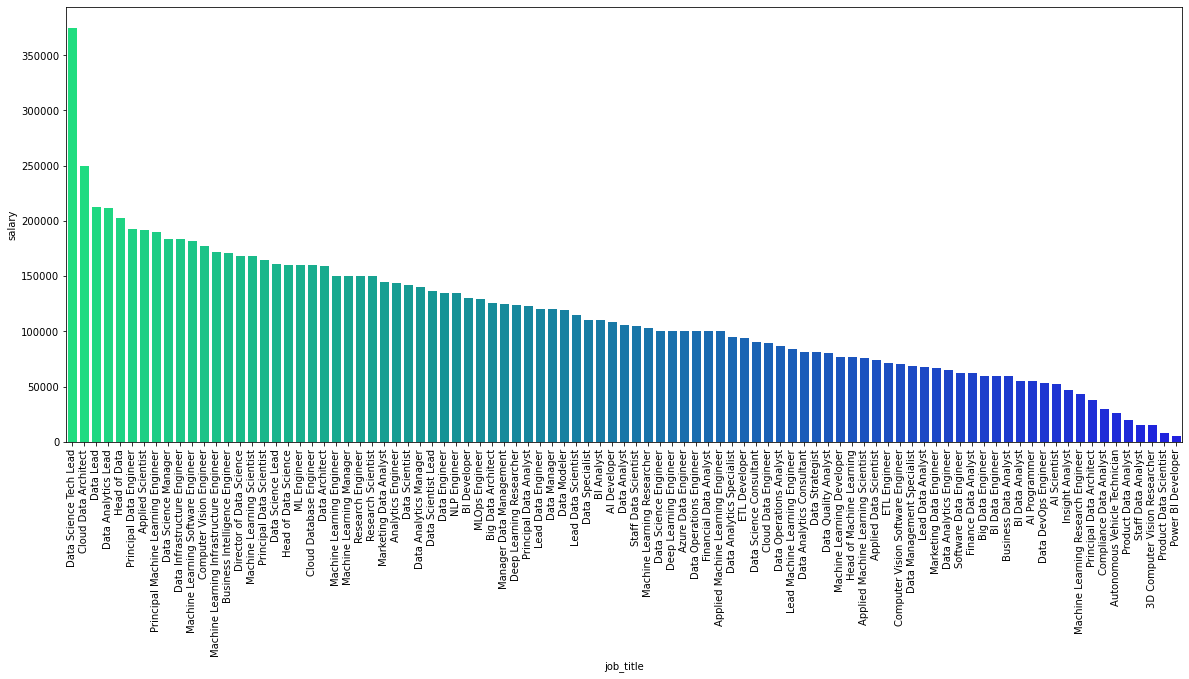

In [48]:
plt.figure(figsize=(20,8))
sns.barplot(data=salary_jobtitle, x = 'job_title', y = 'salary', palette = 'winter_r')
plt.xticks(rotation='vertical')
plt.show()

In [49]:
job_GB = data[data['company_location'] == 'GB']
job_GB = job_GB.groupby('job_title').median()['salary'].sort_values().reset_index()
job_GB.head()

,job_title,salary
0,Insight Analyst,"46,786"
1,Data Analytics Engineer,"50,000"
2,Data Analyst,"60,761"
3,Data Science Consultant,"60,951"
4,Lead Data Scientist,"61,566"


C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


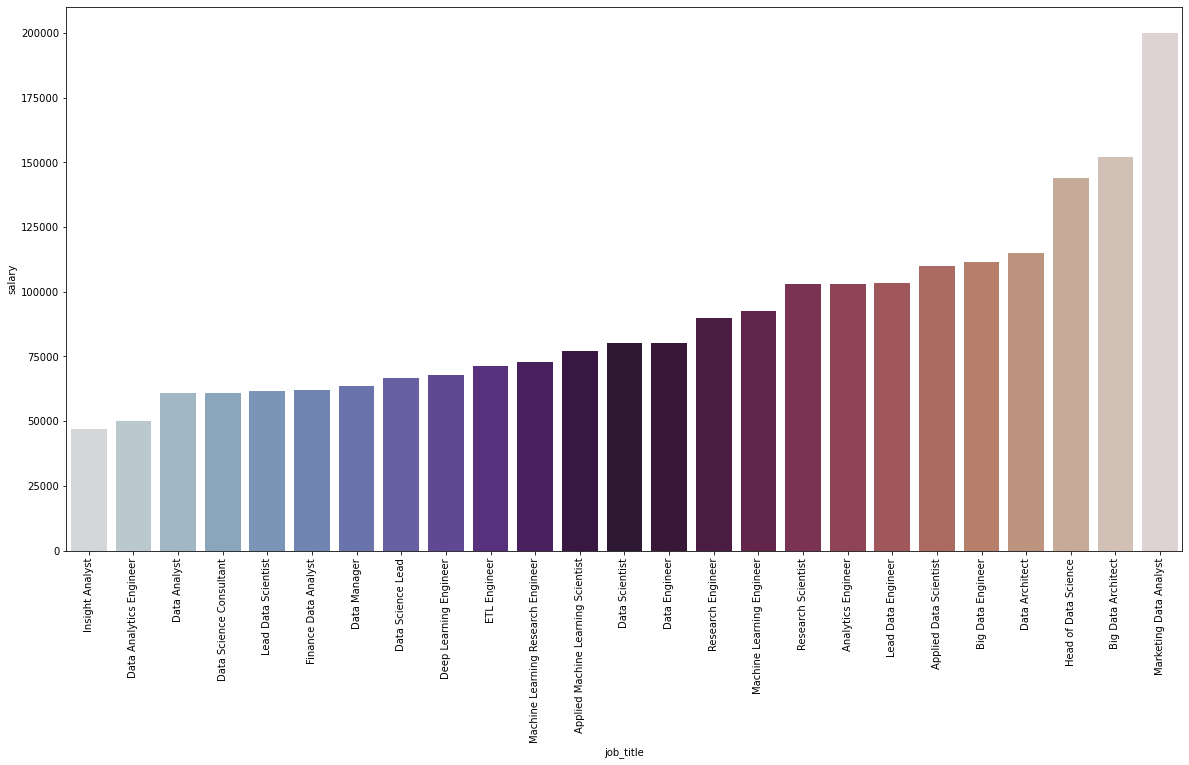

In [50]:
plt.figure(figsize=(20,10))
sns.barplot(job_GB.job_title,job_GB.salary,palette='twilight')
plt.xticks(rotation='vertical')
plt.show()

In [51]:
job_US = data[data['company_location'] == 'US']
job_US = job_US.groupby('job_title').median()['salary'].sort_values().reset_index()
job_US.head()

,job_title,salary
0,BI Data Engineer,"60,000"
1,Big Data Engineer,"70,000"
2,BI Data Analyst,"77,500"
3,Data Quality Analyst,"80,000"
4,Data Analytics Consultant,"81,500"


C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


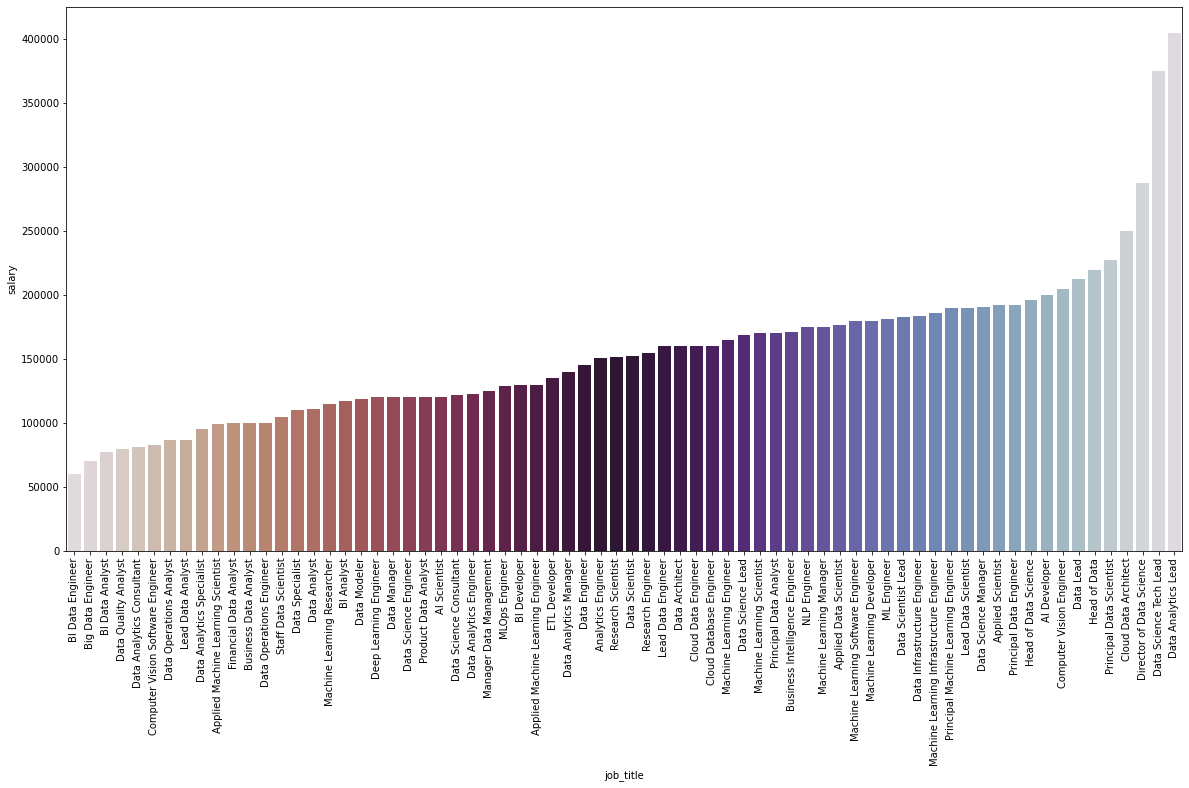

In [52]:
plt.figure(figsize=(20,10))
sns.barplot(job_US.job_title,job_US.salary,palette='twilight_r')
plt.xticks(rotation='vertical')
plt.show()

In [53]:
job_CA = data[data['company_location'] == 'CA']
job_CA = job_CA.groupby('job_title').median()['salary'].sort_values().reset_index()
job_CA.head()

,job_title,salary
0,Staff Data Analyst,"15,000"
1,Computer Vision Software Engineer,"53,654"
2,Applied Data Scientist,"54,238"
3,Business Data Analyst,"69,133"
4,Principal Data Analyst,"75,000"


C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


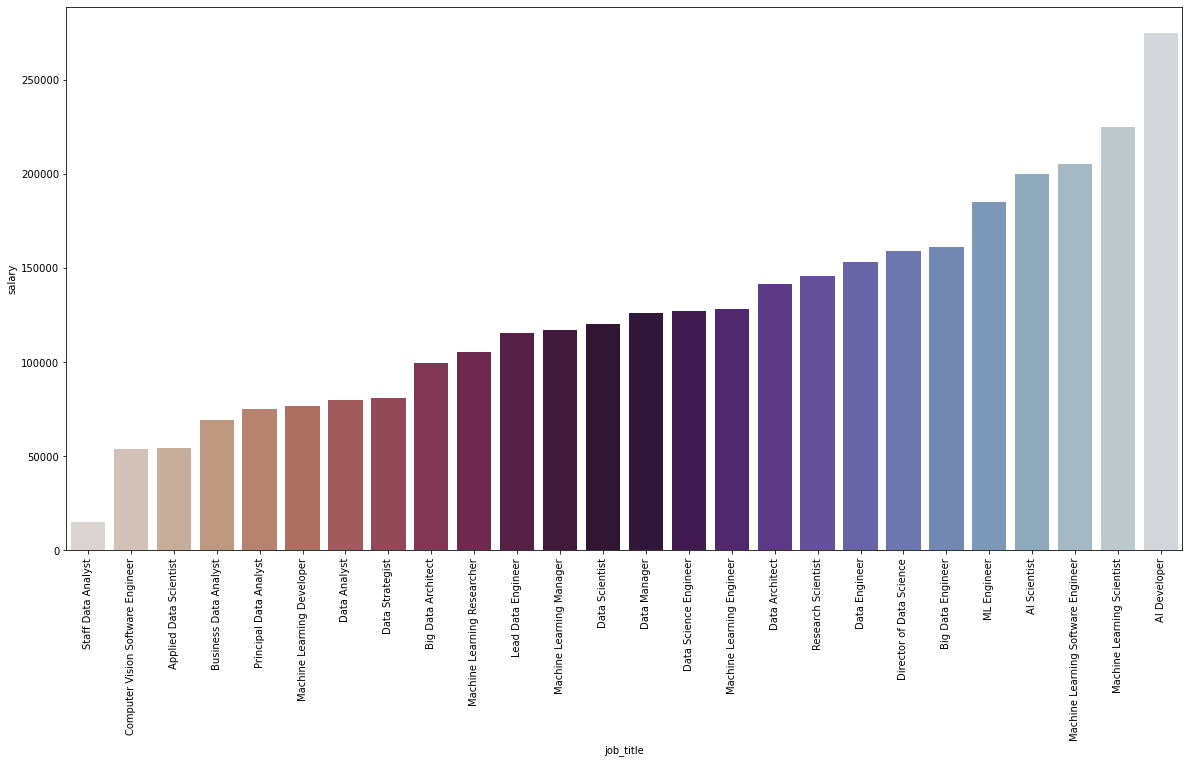

In [54]:
plt.figure(figsize=(20,10))
sns.barplot(job_CA.job_title,job_CA.salary,palette='twilight_r')
plt.xticks(rotation='vertical')
plt.show()

In [55]:
job_ES = data[data['company_location'] == 'ES']
job_ES = job_ES.groupby('job_title').median()['salary'].sort_values().reset_index()
job_ES.head()

,job_title,salary
0,Business Data Analyst,"21,461"
1,AI Scientist,"38,631"
2,Data Analyst,"42,026"
3,Data Scientist,"42,792"
4,Machine Learning Engineer,"47,282"


C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


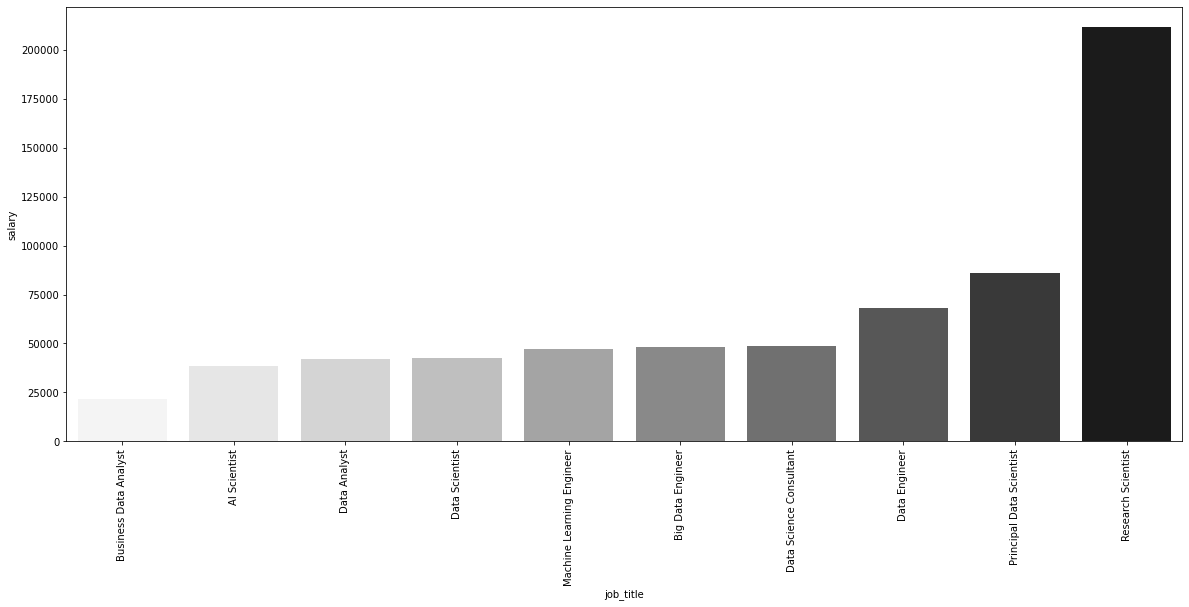

In [56]:
plt.figure(figsize=(20,8))
sns.barplot(job_ES.job_title,job_ES.salary,palette='Greys')
plt.xticks(rotation='vertical')
plt.show()

In [57]:
job_IN = data[data['company_location'] == 'IN']
job_IN = job_IN.groupby('job_title').median()['salary'].sort_values().reset_index()
job_IN.head()

,job_title,salary
0,3D Computer Vision Researcher,"5,409"
1,Power BI Developer,"5,409"
2,Data Science Consultant,"5,707"
3,BI Data Analyst,"8,050"
4,Product Data Analyst,"11,243"


C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


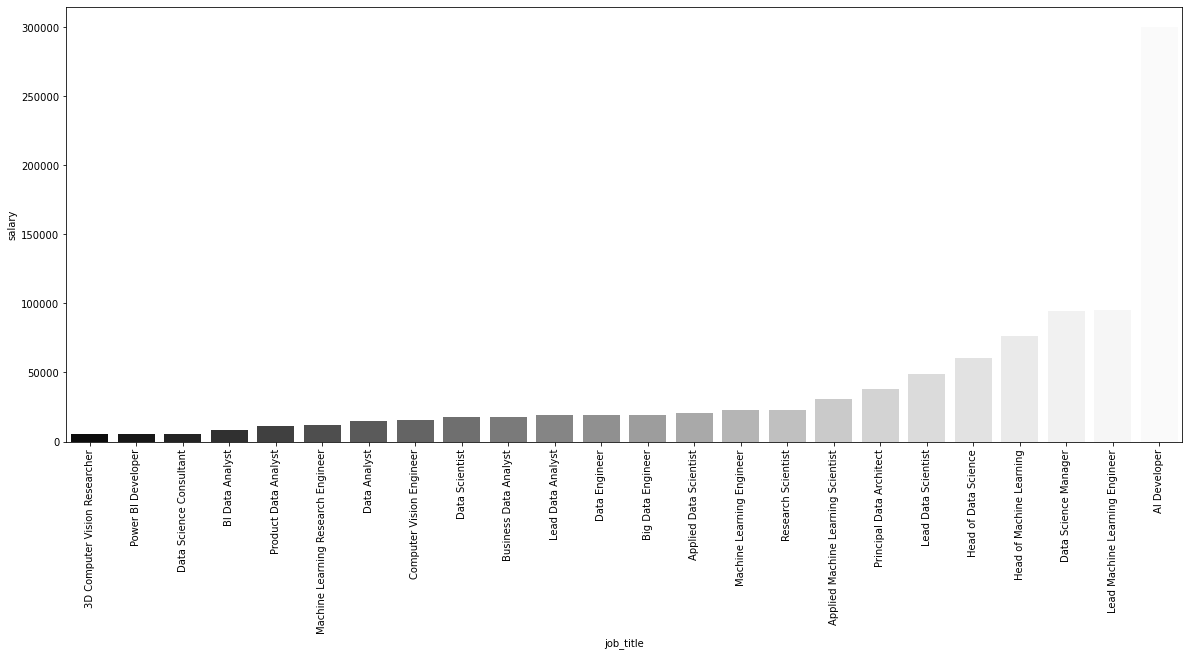

In [58]:
plt.figure(figsize=(20,8))
sns.barplot(job_IN.job_title,job_IN.salary,palette='Greys_r')
plt.xticks(rotation='vertical')
plt.show()

In [59]:
job_DE = data[data['company_location'] == 'DE']
job_DE = job_DE.groupby('job_title').median()['salary'].sort_values().reset_index()
job_DE.head()

,job_title,salary
0,ML Engineer,"15,966"
1,Machine Learning Developer,"33,000"
2,Machine Learning Scientist,"34,672"
3,Applied Machine Learning Scientist,"42,923"
4,Data Engineer,"55,475"


C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


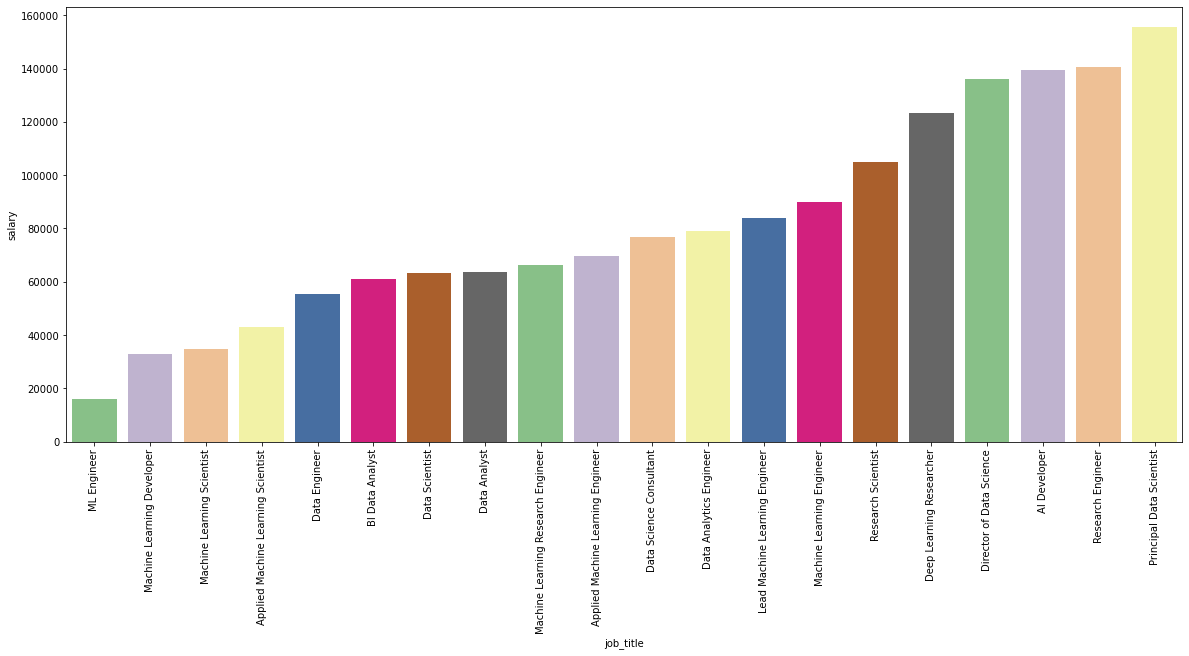

In [60]:
plt.figure(figsize=(20,8))
sns.barplot(job_DE.job_title,job_DE.salary,palette='Accent')
plt.xticks(rotation='vertical')
plt.show()

In [61]:
job_NG = data[data['company_location'] == 'NG']
job_NG = job_NG.groupby('job_title').median()['salary'].sort_values().reset_index()
job_NG.head()

,job_title,salary
0,Data Analyst,"10,000"
1,Compliance Data Analyst,"30,000"
2,Data Scientist,"50,000"
3,Data Quality Analyst,"100,000"
4,BI Analyst,"200,000"


C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


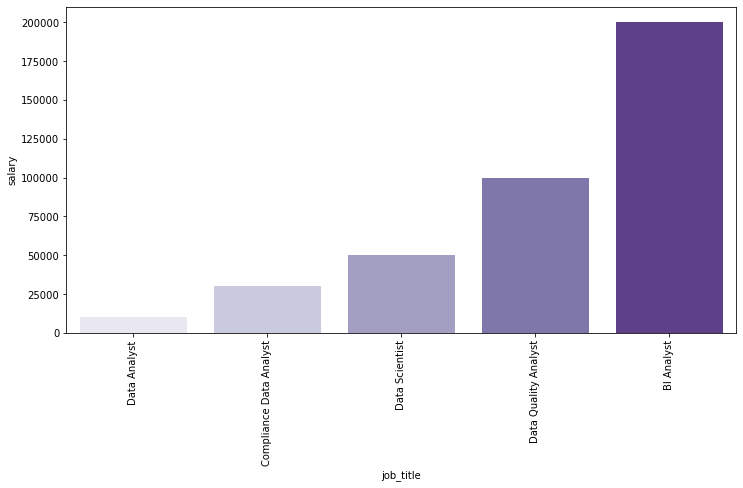

In [62]:
plt.figure(figsize=(12,6))
sns.barplot(job_NG.job_title,job_NG.salary,palette='Purples')
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


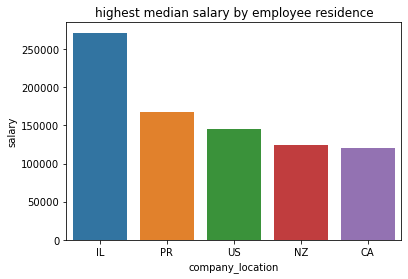

In [74]:
## highest median salary by company location
d1=data.groupby('company_location').salary.median().sort_values(ascending=False).head()
sns.barplot(d1.index,d1.values)
plt.title('highest median salary by employee residence')
plt.ylabel('salary')
plt.show()
plt.show()

C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


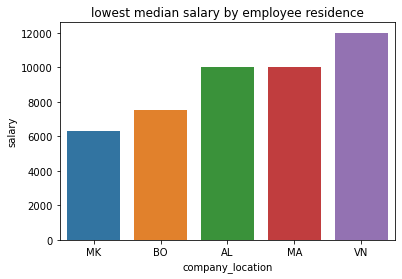

In [79]:
d1=data.groupby('company_location').salary.median().sort_values().head()
sns.barplot(d1.index,d1.values)
plt.title('lowest median salary by employee residence')
plt.ylabel('salary')
plt.show()

C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


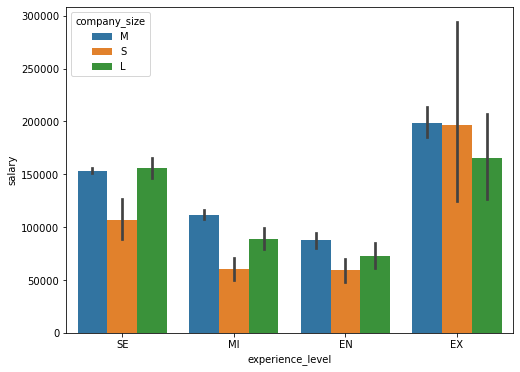

In [88]:
plt.figure(figsize=(8,6))
sns.barplot(data.experience_level,data.salary,hue=data.company_size)
plt.show()

C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


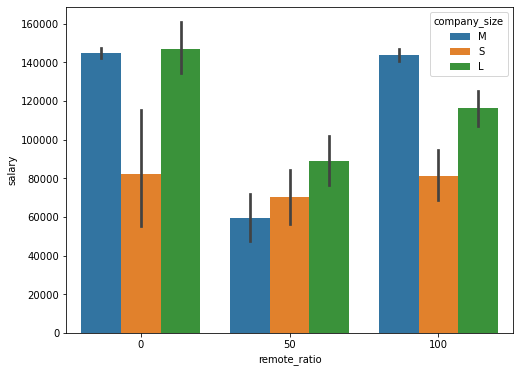

In [89]:
plt.figure(figsize=(8,6))
sns.barplot(data.remote_ratio,data.salary,hue=data.company_size)
plt.show()